Погрешность в первом случае: 5.660704127663507e-10
Погрешность во втором случае: 3.9968028886505635e-15


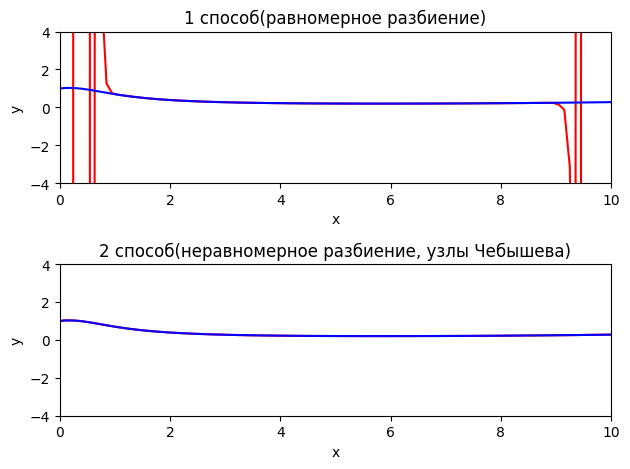

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return np.e**(x/3) / (1 + x**2)

def calculate_chebyshev_knots(a, b, n):
  """Вычисляет узлы Чебышева на отрезке [a, b]"""
  knots = np.zeros(n)
  for k in range(n):
    knots[k] = (b + a) / 2 + (b - a) / 2 * np.cos(np.pi * (2 * k + 1) / (2 * n))
  return knots

def interpolate_lagrange(x_mid, x_values, y_values):
  """Интерполяция Лагранжа"""
  y_mid_values = np.zeros(len(x_mid))
  for i in range(len(x_values)):
    l = np.ones(len(x_mid))
    for j in range(len(x_values)):
      if i != j:
        l *= (x_mid - x_values[j]) / (x_values[i] - x_values[j])
    y_mid_values += y_values[i] * l
  return y_mid_values

def plot_interpolation(x_values, y_values, x_mid_values, y_mid_values, title):
  """Строит график интерполяции"""
  plt.title(title)
  plt.axis((0, 10, -4, 4))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(x_mid_values, y_mid_values, 'r')
  plt.plot(x_values, y_values, 'b')

h = 0.1
a = 0
b = 10

x_values = np.arange(a, b+h, h)
x_mid_values = np.arange(h/2, b, h)
y_values = f(x_values)

y_mid_values = interpolate_lagrange(x_mid_values, x_values, y_values)

n = len(x_values)
x_values_2 = calculate_chebyshev_knots(a, b, n)
x_mid_values_2 = (x_values_2[1:] + x_values_2[:-1]) / 2
y_values_2 = f(x_values_2)
y_mid_values_2 = interpolate_lagrange(x_mid_values_2, x_values_2, y_values_2)

print(f"Погрешность в первом случае: {np.max(np.abs(f(x_mid_values) - y_mid_values)[20:80])}")
print(f"Погрешность во втором случае: {np.max(np.abs(f(x_mid_values_2) - y_mid_values_2))}")

plt.subplot(2, 1, 1)
plot_interpolation(x_values, y_values, x_mid_values, y_mid_values, "1 способ (равномерное разбиение)")

plt.subplot(2, 1, 2)
plot_interpolation(x_values_2, y_values_2, x_mid_values_2, y_mid_values_2, "2 способ (неравномерное разбиение, узлы Чебышева)")

plt.tight_layout()
plt.show()



# Численная интерполяция функции

В данной работе рассматривается численная интерполяция функции \( f(x) \) на отрезке \( [0, 10] \) с использованием интерполяционного полинома Лагранжа. Рассмотрены два типа узлов интерполяции:

1. **Равномерные узлы** — узлы, равномерно распределённые на отрезке \( [0, 10] \).
2. **Узлы Чебышева** — узлы, расположенные по правилу Чебышева, которые минимизируют ошибку интерполяции, особенно на краях отрезка.
$$
x_i = \frac{b - a}{2} \left( \cos\left( \frac{(2i-1)\pi}{2n} \right) + 1 \right) + a, \quad i = 1, 2, \dots, n
$$


## Выводы

- Интерполяция с узлами Чебышева даёт более точные результаты, особенно на краях интервала, по сравнению с равномерными узлами.
- Равномерные узлы, несмотря на свою простоту, могут давать менее точное приближение, особенно при увеличении количества узлов.


# Численное дифференцирование

## Задача
 Необходимо численно вычислить:
1. Первую производную с использованием правой и центральной разностей.
2. Вторую производную с использованием центральных разностей второго и четвертого порядка точности.

## Решение

### Первая производная
Первая производная функции f(x) вычисляется с помощью:
- Правая разность:
$$ f'(x) = \frac{f(x+h) - f(x)}{h} $$
- Центральная разность:
$$ f'(x) = \frac{f(x+h) - f(x-h)}{2h} $$

### Вторая производная
Вторая производная функции f(x) вычисляется с использованием центральных разностей:
- Второй порядок точности:
$$ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} $$
- Четвертый порядок точности:
$$ f''(x) = \frac{-f(x+2h) + 16f(x+h) - 30f(x) + 16f(x-h) - f(x-2h)}{12h^2} $$

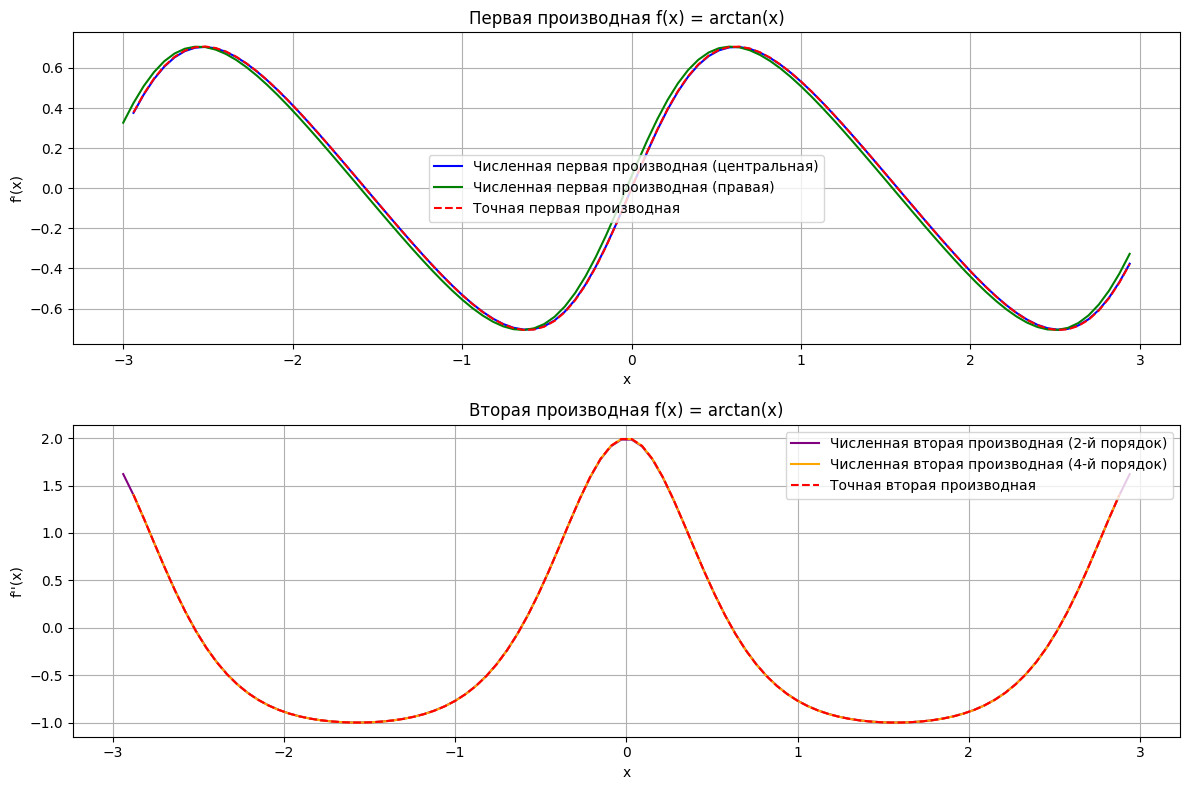

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию
def f(x):
    return np.log(np.sin(x) ** 2 + 1)

# Определяем точные производные для проверки
def f_prime_exact(x):
    return (np.sin(2*x)) / (np.sin(x) ** 2 + 1)

def f_double_prime_exact(x):
    return (2 * np.cos(2*x) * (np.sin(x)**2 + 1) - np.sin(2*x)**2) / (np.sin(x)**2 + 1)**2

# Параметры задачи
a, b = -1.5, 1.5
n = 100  # количество точек сетки
h = (b - a) / (n - 1)
x = np.linspace(a, b, n) #np.linspace создаёт массив из n равномерно распределённых точек между a и b

# Численное дифференцирование
# Правая разность для первой производной
f_prime_right = (f(x[1:]) - f(x[:-1])) / h # f(x[1:]) все значения функции, начиная со второй точки, f(x[:-1]) все значения функции, кроме последней
x_prime_right = x[:-1]  # для отображения правой производной

# Центральная разность для первой производной
f_prime_central = (f(x[2:]) - f(x[:-2])) / (2 * h)
x_prime_central = x[1:-1]  # для центральной разности

# Центральная разность для второй производной (второго порядка точности)
f_double_prime_central_2nd = (f(x[2:]) - 2 * f(x[1:-1]) + f(x[:-2])) / h**2
x_double_prime_central_2nd = x[1:-1]  # для второй производной второго порядка

# Центральная разность для второй производной (четвертого порядка точности)
f_double_prime_central_4th = (-f(x[4:]) + 16 * f(x[3:-1]) - 30 * f(x[2:-2]) + 16 * f(x[1:-3]) - f(x[:-4])) / (12 * h**2)
x_double_prime_central_4th = x[2:-2]  # для второй производной четвертого порядка

# Точные значения производных для сравнения
f_prime_exact_values = f_prime_exact(x_prime_central)  # для центральной разности
f_double_prime_exact_values = f_double_prime_exact(x_double_prime_central_4th)  # для четвертого порядка

# Визуализация результатов
plt.figure(figsize=(12, 8))

# Первая производная
plt.subplot(2, 1, 1)
plt.plot(x_prime_central, f_prime_central, label="Численная первая производная (центральная)", color="blue")
plt.plot(x_prime_right, f_prime_right, label="Численная первая производная (правая)", color="green")
plt.plot(x_prime_central, f_prime_exact_values, label="Точная первая производная", color="red", linestyle="dashed")
plt.title("Первая производная f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid()

# Вторая производная
plt.subplot(2, 1, 2)
plt.plot(x_double_prime_central_2nd, f_double_prime_central_2nd, label="Численная вторая производная (2-й порядок)", color="purple")
plt.plot(x_double_prime_central_4th, f_double_prime_central_4th, label="Численная вторая производная (4-й порядок)", color="orange")
plt.plot(x_double_prime_central_4th, f_double_prime_exact_values, label="Точная вторая производная", color="red", linestyle="dashed")
plt.title("Вторая производная f(x)")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Численное интегрирование функции

## Описание задачи

Требуется применить следующие методы численного интегрирования:

1. Метод прямоугольников (левый, правый и средний).
2. Метод трапеций.
3. Метод Симпсона.

Кроме того, необходимо исследовать зависимость ошибки от количества разбиений.

## Используемые методы

### Метод правых прямоугольников
Метод правых прямоугольников использует правые границы подынтегральных интервалов для аппроксимации интеграла:

$$
I \approx \sum_{i=1}^{n} f(x_i) \Delta x
$$

где  $$ ( x_i = a + i \cdot \Delta x ), ( \Delta x = \frac{b - a}{n} ), и ( a ) и ( b ) $$ — границы интегрирования.

### Метод левых прямоугольников
Метод левых прямоугольников использует левые границы подынтегральных интервалов:

$$
I \approx \sum_{i=0}^{n-1} f(x_i) \Delta x
$$

где $$ ( x_i = a + i \cdot \Delta x ), ( \Delta x = \frac{b - a}{n} ), и ( a ) и ( b ) $$ — границы интегрирования.

### Метод средних прямоугольников
Метод средних прямоугольников использует середину интервала для аппроксимации:

$$
I \approx \sum_{i=0}^{n-1} f\left( \frac{x_i + x_{i+1}}{2} \right) \Delta x
$$

где  $$ ( x_i = a + i \cdot \Delta x ), ( x_{i+1} = a + (i+1) \cdot \Delta x ), и ( \Delta x = \frac{b - a}{n} ). $$

### Метод трапеций
Метод трапеций аппроксимирует интеграл как сумму площадей трапеций:

$$
I \approx \frac{\Delta x}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right]
$$

где $$ ( \Delta x = \frac{b - a}{n} ), и ( x_i = a + i \cdot \Delta x ). $$

### Метод Симпсона
Метод Симпсона использует аппроксимацию параболой. Он предполагает, что подынтегральная функция может быть аппроксимирована квадратичной функцией на каждом интервале:

$$
I \approx \frac{\Delta x}{3} \left[ f(a) + 4 \sum_{i=1, \text{чет.}}^{n-1} f(x_i) + 2 \sum_{i=2, \text{неч.}}^{n-2} f(x_i) + f(b) \right]
$$

где  $$ ( \Delta x = \frac{b - a}{n} ), и ( x_i = a + i \cdot \Delta x ). $$

Точное значение интеграла: 0.4060058497098382
Ошибки метода правых прямоугольников: [0.49001168338345547, 0.04110379913526546, 0.02144441952872178, 0.014506157911326145, 0.010960051397395698, 0.008807103043767195, 0.007361113577860345, 0.006322978025018744, 0.0055414663651977, 0.004931891005710454]
Ошибки метода левых прямоугольников: [0.4066740350962262, 0.04041308436288754, 0.021254900398881893, 0.01441918784608287, 0.010910331980157617, 0.008774969867598958, 0.007338652298855497, 0.00630639829159646, 0.0055287276901062055, 0.004921798208351813]
Ошибки метода средних прямоугольников: [0.020789291165985935, 0.00017267559914146968, 4.7379549534709575e-05, 2.174246725888951e-05, 1.2429838279093275e-05, 8.033287346442819e-06, 5.615316478635446e-06, 4.1449315731911796e-06, 3.184667720756984e-06, 2.5231986790497096e-06]
Ошибки метода трапеций: [0.04166882414361356, 0.00034535738618884926, 9.475956491999948e-05, 4.3485032621526365e-05, 2.4859708619706655e-05, 1.6066588084007183e-05, 1.12306

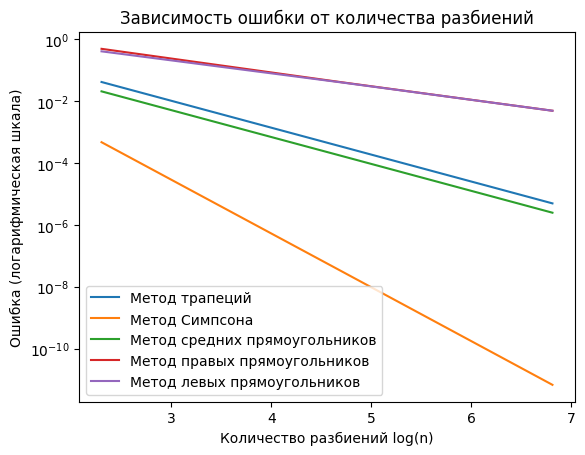

In [4]:
import numpy as np
from scipy.integrate import quad

def f(x):
    return x * np.exp(x)

# Определяем пределы интегрирования [a, b]
a, b = -2, 1

# Вычисление точного значения интеграла для сравнения

integral, _ = quad(f, a, b)
print("Точное значение интеграла:", integral)

# Реализация численных методов

# Метод прямоугольников (левый, правый и средний)
def rectangle_method(f, a, b, n, method='left'):
    h = (b - a) / n
    if method == 'left':
        x = np.linspace(a, b-h, n)
    elif method == 'right':
        x = np.linspace(a+h, b, n)
    elif method == 'middle':
        x = np.linspace(a + h/2, b - h/2, n)
    else:
        raise ValueError("Unknown method: choose 'left', 'right', or 'middle'")

    return h * np.sum(f(x))

# Метод трапеций
def trapezoidal_method(f, a, b, n):
    h = (b - a) / n  # шаг сетки
    x_values = np.linspace(a, b, n + 1)
    # суммирование значений на краях и в серединах отрезков
    integral = (h / 2) * (f(x_values[0]) + 2 * np.sum(f(x_values[1:-1])) + f(x_values[-1]))
    return integral

# Метод Симпсона
def simpsons_method(f, a, b, n):
    if n % 2 == 1:  # Метод Симпсона требует чётного количества отрезков
        n += 1
    h = (b - a) / n
    x_values = np.linspace(a, b, n + 1)
    # суммирование значений по формуле Симпсона
    integral = (h / 3) * (f(x_values[0]) + 4 * np.sum(f(x_values[1:-1:2])) + 2 * np.sum(f(x_values[2:-2:2])) + f(x_values[-1]))
    return integral

# Список количества отрезков для анализа ошибки
n_values = np.arange(10, 1000, 100)
errors_rectangle_l = []
errors_rectangle_r = []
errors_rectangle_m = []
errors_trapezoidal = []
errors_simpsons = []

# Вычисление ошибок для каждого метода и количества отрезков
for n in n_values:
    rectangle_approx_l = rectangle_method(f, a, b, n, method='left')
    rectangle_approx_r = rectangle_method(f, a, b, n, method='right')
    rectangle_approx_m = rectangle_method(f, a, b, n, method='middle')
    trapezoidal_approx = trapezoidal_method(f, a, b, n)
    simpsons_approx = simpsons_method(f, a, b, n)

    # Вычисление ошибок
    errors_rectangle_l.append(abs(rectangle_approx_l - integral))
    errors_rectangle_r.append(abs(rectangle_approx_r - integral))
    errors_rectangle_m.append(abs(rectangle_approx_m - integral))
    errors_trapezoidal.append(abs(trapezoidal_approx - integral))
    errors_simpsons.append(abs(simpsons_approx - integral))

# Вывод ошибок для анализа
print("Ошибки метода правых прямоугольников:", errors_rectangle_r)
print("Ошибки метода левых прямоугольников:", errors_rectangle_l)
print("Ошибки метода средних прямоугольников:", errors_rectangle_m)
print("Ошибки метода трапеций:", errors_trapezoidal)
print("Ошибки метода Симпсона:", errors_simpsons)

# Построим график зависимости ошибки от количества разбиений
plt.plot(np.log(n_values), errors_trapezoidal, label="Метод трапеций")
plt.plot(np.log(n_values), errors_simpsons, label="Метод Симпсона")
plt.plot(np.log(n_values), errors_rectangle_m, label="Метод средних прямоугольников")
plt.plot(np.log(n_values), errors_rectangle_r, label="Метод правых прямоугольников")
plt.plot(np.log(n_values), errors_rectangle_l, label="Метод левых прямоугольников")
plt.yscale('log')
plt.xlabel("Количество разбиений log(n)")
plt.ylabel("Ошибка (логарифмическая шкала)")
plt.legend()
plt.title("Зависимость ошибки от количества разбиений")
plt.show()

# Поиск придлиженных значений корней нелинейных уравнений


## Постановка задачи

Задача заключается в том, чтобы с 3 разными точностями, а именно 10^-3, 10^-6, 10^-9 найти приближенное значение корня уравнения
лежащее на интервале (0,10). Для поиска корня надо использовать метод дихотомии и метод Ньютона.

## Метод дихотомии

Метод дихотомии — это численный метод нахождения корня уравнения \( f(x) = 0 \) на отрезке \([a, b]\), если известно, что функция \( f(x) \) непрерывна и противоположные знаки функции в концах интервала, то есть \( f(a) * f(b) < 0 \).

Принцип метода дихотомии заключается в следующем:

1. **Разделение интервала пополам**: Метод начинается с того, что интервал \([a, b]\) делится пополам в точке \( c = (a + b)/2 \).
2. **Проверка знаков функции**: Если \( f(c) = 0 \), то найден корень и вычисления завершаются. Если \( f(c) =/= 0 \), то нужно определить, на какой части интервала находится корень:
   - Если \( f(a)*f(c) < 0 \), то корень лежит в интервале \([a, c]\), и новый интервал становится \([a, c]\).
   - Если \( f(c)*f(b) < 0 \), то корень лежит в интервале \([c, b]\), и новый интервал становится \([c, b]\).
3. **Повторение процесса**: Шаги 1 и 2 повторяются до тех пор, пока длина интервала не станет достаточно малой (менее заданного значения epsilon), что будет означать нахождение приближенного значения корня.

Таким образом, метод дихотомии делит интервал пополам на каждом шаге, постепенно сужая его, пока не будет найдено требуемое приближенное решение.

### Преимущества метода:
- Метод гарантирует нахождение корня, если функция непрерывна и знаки на концах интервала противоположные.
- Он всегда сходится, но может требовать большого числа итераций для точного ответа.

### Недостатки:
- Метод может быть медленным, особенно для высокоточных решений, так как скорость сходимости пропорциональна логарифму количества делений интервала.

## Метод Ньютона

Метод Ньютона (или метод касательных) — это итерационный метод нахождения корня уравнения \( f(x) = 0 \), который использует производную функции для приближенного нахождения корня. Метод основан на использовании касательных к графику функции для уточнения приближения к корню.

### Описание метода:

Предположим, что нам нужно найти корень уравнения \( f(x) = 0 \). Метод Ньютона начинается с начального приближения \( x_0 \), затем на каждом шаге вычисляется новое приближение по следующей формуле:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

где:
- \( x_n \) — текущее приближение к корню,
- \( f(x_n) \) — значение функции в точке \( x_n \),
- \( f'(x_n) \) — производная функции в точке \( x_n \),
- \( x_{n+1} \) — новое приближение.

### Шаги метода:

1. **Выбор начального приближения** \( x_0 \).
2. **Итерации**: На каждом шаге вычисляется новое приближение с помощью формулы:
   $$
   x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
   $$
   Этот процесс повторяется до тех пор, пока выполняется условие:
   - \( |f(x_n)| < epsilon \), где epsilon — заданная точность, то есть значение функции в точке \( x_n \) становится достаточно близким к нулю.

3. **Завершение**: Когда условие для точности выполняется, алгоритм завершает выполнение, и последнее значение \( x_n \) считается приближенным корнем.

### Преимущества метода:
- Метод Ньютона сходится очень быстро, если начальное приближение близко к корню и функция хорошо обусловлена.
- Сходимость метода квадратичная, что означает, что количество правильных знаков увеличивается экспоненциально с каждым шагом.

### Недостатки:
- Требуется вычисление производной функции \( f'(x) \), что может быть проблемой для сложных функций.
- Если начальное приближение далекое от корня или функция плохо обусловлена, метод может не сходиться или сходиться к неправильному корню.
- Если производная функции в точке \( x_n \) равна нулю, это может привести к делению на ноль и остановке вычислений.

In [8]:
import numpy as np

# Определение функции f(x)
def f(x):
    return np.arccos((x - 3)/8) - x**2 / 2 + 3*x + 1

# Производная функции для метода Ньютона
def f_prime(x):
    return -1 / np.sqrt(55 + 6*x - x**2) - x + 3

# Метод дихотомии (бисекции)
def bisection_method(f, a, b, epsilon):
    if f(a) * f(b) > 0:
        print("На данном интервале нет корня или их чётное количество.")
        return None
    while (b - a) / 2 > epsilon:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Метод Ньютона
def newton_method(f, f_prime, x0, epsilon, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        fpx = f_prime(x)
        if abs(fx) < epsilon:
            return x
        if fpx == 0:
            print("Производная равна нулю. Метод Ньютона не может продолжить.")
            return None
        x -= fx / fpx
    print("Метод Ньютона не сошелся за максимальное число итераций.")
    return None

# Начальные условия
a, b = 0, 10  # интервал
initial_guess = 5  # начальное приближение для метода Ньютона
epsilons = [1e-3, 1e-6, 1e-9]

# Вычисление корней для каждой точности
for epsilon in epsilons:
    print(f"\nТочность: {epsilon}")

    # Метод дихотомии
    root_bisection = bisection_method(f, a, b, epsilon)
    print(f"Корень, найденный методом дихотомии: {root_bisection}")

    # Метод Ньютона
    root_newton = newton_method(f, f_prime, initial_guess, epsilon)
    print(f"Корень, найденный методом Ньютона: {root_newton}")


Точность: 0.001
Корень, найденный методом дихотомии: 6.6326904296875
Корень, найденный методом Ньютона: 6.633016433260097

Точность: 1e-06
Корень, найденный методом дихотомии: 6.633016467094421
Корень, найденный методом Ньютона: 6.633016433260097

Точность: 1e-09
Корень, найденный методом дихотомии: 6.633016423438676
Корень, найденный методом Ньютона: 6.6330164231884154
